<a href="https://colab.research.google.com/github/sanjay7178/Basics-for-ML-python/blob/main/PyTorch_Segmenation_Through_Boundaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from scipy import ndimage
from skimage import feature
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt


In [ ]:

def load_and_preprocess(image_path):
    """Load and preprocess the image."""
    # Read image
    img = cv2.imread(image_path)

    # Convert to RGB (from BGR)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert to grayscale
    if len(img.shape) == 3:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        img_gray = img

    # Apply Gaussian smoothing
    img_smooth = cv2.GaussianBlur(img_gray, (5, 5), 1.5)

    return img_rgb, img_gray, img_smooth

def detect_edges(img_smooth):
    """Detect edges using multiple methods."""
    # Sobel edges
    sobel_x = cv2.Sobel(img_smooth, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img_smooth, cv2.CV_64F, 0, 1, ksize=3)
    edges_sobel = np.sqrt(sobel_x**2 + sobel_y**2)
    edges_sobel = (edges_sobel * 255 / edges_sobel.max()).astype(np.uint8)

    # Canny edges
    edges_canny = feature.canny(img_smooth, sigma=2)

    # Prewitt edges
    edges_prewitt = feature.prewitt(img_smooth)
    edges_prewitt = (edges_prewitt * 255 / edges_prewitt.max()).astype(np.uint8)

    return edges_sobel, edges_canny, edges_prewitt

def enhance_boundaries(edges):
    """Enhance detected boundaries using morphological operations."""
    # Create kernel for morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

    # Dilate edges
    edges_dilated = cv2.dilate(edges.astype(np.uint8), kernel, iterations=1)

    # Close gaps
    edges_closed = cv2.morphologyEx(edges_dilated, cv2.MORPH_CLOSE, kernel)

    return edges_closed

def watershed_segmentation(img_gray, edges):
    """Perform watershed segmentation."""
    # Distance transform
    dist_transform = ndimage.distance_transform_edt(~edges)

    # Find local maxima
    local_max = peak_local_max(dist_transform, indices=False, min_distance=20,
                              labels=~edges)

    # Create markers for watershed
    markers = ndimage.label(local_max)[0]

    # Apply watershed
    labels = watershed(-dist_transform, markers, mask=~edges)

    return labels

def analyze_segments(labels):
    """Analyze the segmented regions."""
    num_segments = len(np.unique(labels)) - 1  # Subtract 1 to exclude background

    # Calculate properties for each segment
    segments_info = []
    for label_id in range(1, num_segments + 1):
        segment_mask = (labels == label_id)
        area = np.sum(segment_mask)
        centroid = ndimage.measurements.center_of_mass(segment_mask)
        segments_info.append({
            'id': label_id,
            'area': area,
            'centroid': centroid
        })

    return segments_info

def visualize_results(img_rgb, edges_sobel, edges_canny, edges_prewitt,
                     edges_enhanced, labels):
    """Visualize the segmentation results."""
    plt.figure(figsize=(15, 10))

    # Original image
    plt.subplot(231)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    # Sobel edges
    plt.subplot(232)
    plt.imshow(edges_sobel, cmap='gray')
    plt.title('Sobel Edges')
    plt.axis('off')

    # Canny edges
    plt.subplot(233)
    plt.imshow(edges_canny, cmap='gray')
    plt.title('Canny Edges')
    plt.axis('off')

    # Prewitt edges
    plt.subplot(234)
    plt.imshow(edges_prewitt, cmap='gray')
    plt.title('Prewitt Edges')
    plt.axis('off')

    # Enhanced edges
    plt.subplot(235)
    plt.imshow(edges_enhanced, cmap='gray')
    plt.title('Enhanced Edges')
    plt.axis('off')

    # Final segmentation
    plt.subplot(236)
    plt.imshow(labels, cmap='nipy_spectral')
    plt.title('Watershed Segmentation')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def main(image_path):
    """Main function to run the segmentation pipeline."""
    # Load and preprocess image
    img_rgb, img_gray, img_smooth = load_and_preprocess(image_path)

    # Detect edges using different methods
    edges_sobel, edges_canny, edges_prewitt = detect_edges(img_smooth)

    # Enhance boundaries
    edges_enhanced = enhance_boundaries(edges_canny)

    # Perform watershed segmentation
    labels = watershed_segmentation(img_gray, edges_enhanced)

    # Analyze segments
    segments_info = analyze_segments(labels)

    # Print segment information
    print(f"Found {len(segments_info)} segments:")
    for segment in segments_info:
        print(f"Segment {segment['id']}:")
        print(f"  Area: {segment['area']} pixels")
        print(f"  Centroid: ({segment['centroid'][0]:.1f}, "
              f"{segment['centroid'][1]:.1f})")

    # Visualize results
    visualize_results(img_rgb, edges_sobel, edges_canny, edges_prewitt,
                     edges_enhanced, labels)

# Example usage
if __name__ == "__main__":
    # Replace with your image path
    image_path = "/content/237-536x354.jpg"
    main(image_path)

AttributeError: No skimage.feature attribute prewitt

In [ ]:
import numpy as np
import cv2
from scipy import ndimage
from skimage import feature, data
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt
import os

def load_and_preprocess(image_path):
    """Load and preprocess the image."""
    # Read image
    img = cv2.imread(image_path)

    # Convert to RGB (from BGR)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert to grayscale
    if len(img.shape) == 3:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        img_gray = img

    # Apply Gaussian smoothing
    img_smooth = cv2.GaussianBlur(img_gray, (5, 5), 1.5)

    return img_rgb, img_gray, img_smooth

def detect_edges(img_smooth):
    """Detect edges using multiple methods."""
    # Sobel edges
    sobel_x = cv2.Sobel(img_smooth, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img_smooth, cv2.CV_64F, 0, 1, ksize=3)
    edges_sobel = np.sqrt(sobel_x**2 + sobel_y**2)
    edges_sobel = (edges_sobel * 255 / edges_sobel.max()).astype(np.uint8)

    # Canny edges
    edges_canny = feature.canny(img_smooth, sigma=2)

    # Prewitt edges - Changed to use skimage.filters
    edges_prewitt = filters.prewitt(img_smooth)
    edges_prewitt = (edges_prewitt * 255 / edges_prewitt.max()).astype(np.uint8)

    return edges_sobel, edges_canny, edges_prewitt

    return edges_sobel, edges_canny, edges_prewitt

def enhance_boundaries(edges):
    """Enhance detected boundaries using morphological operations."""
    # Create kernel for morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

    # Dilate edges
    edges_dilated = cv2.dilate(edges.astype(np.uint8), kernel, iterations=1)

    # Close gaps
    edges_closed = cv2.morphologyEx(edges_dilated, cv2.MORPH_CLOSE, kernel)

    return edges_closed

def watershed_segmentation(img_gray, edges):
    """Perform watershed segmentation."""
    # Distance transform
    dist_transform = ndimage.distance_transform_edt(~edges)

    # Find local maxima
    local_max = peak_local_max(dist_transform, indices=False, min_distance=20,
                              labels=~edges)

    # Create markers for watershed
    markers = ndimage.label(local_max)[0]

    # Apply watershed
    labels = watershed(-dist_transform, markers, mask=~edges)

    return labels

def analyze_segments(labels):
    """Analyze the segmented regions."""
    num_segments = len(np.unique(labels)) - 1  # Subtract 1 to exclude background

    # Calculate properties for each segment
    segments_info = []
    for label_id in range(1, num_segments + 1):
        segment_mask = (labels == label_id)
        area = np.sum(segment_mask)
        centroid = ndimage.measurements.center_of_mass(segment_mask)
        segments_info.append({
            'id': label_id,
            'area': area,
            'centroid': centroid
        })

    return segments_info

def visualize_results(img_rgb, edges_sobel, edges_canny, edges_prewitt,
                     edges_enhanced, labels):
    """Visualize the segmentation results."""
    plt.figure(figsize=(15, 10))

    # Original image
    plt.subplot(231)
    plt.imshow(img_rgb, cmap='gray' if len(img_rgb.shape) == 2 else None)
    plt.title('Original Image')
    plt.axis('off')

    # Sobel edges
    plt.subplot(232)
    plt.imshow(edges_sobel, cmap='gray')
    plt.title('Sobel Edges')
    plt.axis('off')

    # Canny edges
    plt.subplot(233)
    plt.imshow(edges_canny, cmap='gray')
    plt.title('Canny Edges')
    plt.axis('off')

    # Prewitt edges
    plt.subplot(234)
    plt.imshow(edges_prewitt, cmap='gray')
    plt.title('Prewitt Edges')
    plt.axis('off')

    # Enhanced edges
    plt.subplot(235)
    plt.imshow(edges_enhanced, cmap='gray')
    plt.title('Enhanced Edges')
    plt.axis('off')

    # Final segmentation
    plt.subplot(236)
    plt.imshow(labels, cmap='nipy_spectral')
    plt.title('Watershed Segmentation')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def main(image_path=None):
    """Main function to run the segmentation pipeline."""
    # Load and preprocess image
    img_rgb, img_gray, img_smooth = load_and_preprocess(image_path)

    # Detect edges using different methods
    edges_sobel, edges_canny, edges_prewitt = detect_edges(img_smooth)

    # Enhance boundaries
    edges_enhanced = enhance_boundaries(edges_canny)

    # Perform watershed segmentation
    labels = watershed_segmentation(img_gray, edges_enhanced)

    # Analyze segments
    segments_info = analyze_segments(labels)

    # Print segment information
    print(f"\nFound {len(segments_info)} segments:")
    for segment in segments_info:
        print(f"Segment {segment['id']}:")
        print(f"  Area: {segment['area']} pixels")
        print(f"  Centroid: ({segment['centroid'][0]:.1f}, "
              f"{segment['centroid'][1]:.1f})")

    # Visualize results
    visualize_results(img_rgb, edges_sobel, edges_canny, edges_prewitt,
                     edges_enhanced, labels)

# Example usage
if __name__ == "__main__":
    # You can either specify your image path or let it use the sample image
    # image_path = "your_image.jpg"  # Uncomment and modify this line to use your image
    main()  # Will use sample image if no path is provided

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


## using torch

Using device: cpu


<ipython-input-7-d856e0512943>:178: UserWarning: The label '__background__' of <matplotlib.patches.Rectangle object at 0x7d47ac043070> starts with '_'. It is thus excluded from the legend.
  fig.legend(legend_elements, class_names,


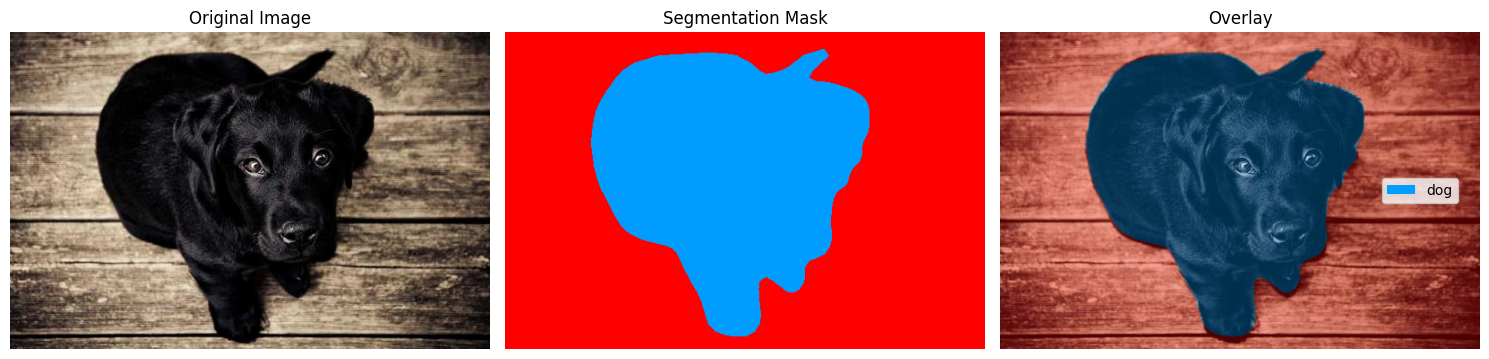


Detected classes:
- dog


In [ ]:
import torch
import torchvision
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import cv2

class PretrainedSegmenter:
    def __init__(self, model_name='deeplabv3_resnet101', device=None):
        """
        Initialize the segmenter with a pre-trained model
        Args:
            model_name: 'deeplabv3_resnet101' or 'deeplabv3_resnet50'
            device: torch.device, if None, will auto-select
        """
        if device is None:
            self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        else:
            self.device = device

        print(f"Using device: {self.device}")

        # Load pre-trained model
        if model_name == 'deeplabv3_resnet101':
            self.model = torchvision.models.segmentation.deeplabv3_resnet101(pretrained=True)
        elif model_name == 'deeplabv3_resnet50':
            self.model = torchvision.models.segmentation.deeplabv3_resnet50(pretrained=True)
        else:
            raise ValueError(f"Unknown model name: {model_name}")

        self.model = self.model.to(self.device)
        self.model.eval()

        # Define image transforms
        self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                              std=[0.229, 0.224, 0.225])
        ])

        # PASCAL VOC classes
        self.CLASSES = [
            '__background__', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
            'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse',
            'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'
        ]

        # Generate distinct colors for each class
        self.COLORS = self._generate_colors(len(self.CLASSES))

    def _generate_colors(self, num_classes):
        """Generate distinct colors for visualization"""
        colors = []
        for i in range(num_classes):
            # Use HSV color space for better distinction
            hue = i / num_classes
            sat = 0.7 + (i % 3) * 0.1  # Vary saturation
            val = 0.8 + (i % 2) * 0.2   # Vary value

            # Convert HSV to RGB
            rgb = plt.cm.hsv(hue)[:3]
            colors.append(rgb)

        return np.array(colors)

    def load_image(self, image_path):
        """
        Load image from path or URL
        """
        try:
            if image_path.startswith(('http://', 'https://')):
                response = requests.get(image_path)
                image = Image.open(BytesIO(response.content)).convert('RGB')
            else:
                image = Image.open(image_path).convert('RGB')
            return image
        except Exception as e:
            raise Exception(f"Error loading image: {str(e)}")

    def preprocess_image(self, image):
        """
        Preprocess image for the model
        """
        # Resize while maintaining aspect ratio
        width, height = image.size
        max_size = 1024
        if max(width, height) > max_size:
            scale = max_size / max(width, height)
            new_width = int(width * scale)
            new_height = int(height * scale)
            image = image.resize((new_width, new_height), Image.LANCZOS)

        # Transform the image
        input_tensor = self.transform(image)
        input_batch = input_tensor.unsqueeze(0)
        return input_batch.to(self.device)

    def segment_image(self, image_path):
        """
        Perform segmentation on the image
        """
        # Load and preprocess image
        original_image = self.load_image(image_path)
        input_batch = self.preprocess_image(original_image)

        # Inference
        with torch.no_grad():
            output = self.model(input_batch)['out'][0]

        # Post-process the output
        output_predictions = output.argmax(0).cpu().numpy()

        return original_image, output_predictions

    def create_segmentation_overlay(self, image, segmentation):
        """
        Create a colored overlay of the segmentation
        """
        # Convert PIL image to numpy array
        image_np = np.array(image)

        # Create colored segmentation mask
        colored_mask = np.zeros_like(image_np)
        for class_idx in range(len(self.CLASSES)):
            mask = segmentation == class_idx
            colored_mask[mask] = (self.COLORS[class_idx] * 255).astype(np.uint8)

        # Create overlay
        overlay = cv2.addWeighted(image_np, 0.7, colored_mask, 0.3, 0)

        return overlay, colored_mask

    def create_class_legend(self, segmentation):
        """
        Create a legend showing only the classes present in the image
        """
        present_classes = np.unique(segmentation)
        class_names = [self.CLASSES[i] for i in present_classes]
        class_colors = [self.COLORS[i] for i in present_classes]

        return class_names, class_colors

    def visualize_results(self, image_path):
        """
        Visualize segmentation results with original image, overlay, and legend
        """
        # Perform segmentation
        original_image, segmentation = self.segment_image(image_path)
        overlay, colored_mask = self.create_segmentation_overlay(original_image, segmentation)

        # Get present classes for legend
        class_names, class_colors = self.create_class_legend(segmentation)

        # Create figure
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        # Plot original image
        axes[0].imshow(original_image)
        axes[0].set_title('Original Image')
        axes[0].axis('off')

        # Plot segmentation mask
        axes[1].imshow(colored_mask)
        axes[1].set_title('Segmentation Mask')
        axes[1].axis('off')

        # Plot overlay
        axes[2].imshow(overlay)
        axes[2].set_title('Overlay')
        axes[2].axis('off')

        # Add legend
        legend_elements = [plt.Rectangle((0, 0), 1, 1, fc=color)
                         for color in class_colors]
        fig.legend(legend_elements, class_names,
                  loc='center right', bbox_to_anchor=(0.98, 0.5))

        plt.tight_layout()
        plt.show()

        # Print detected classes
        print("\nDetected classes:")
        for name in class_names:
            if name != '__background__':
                print(f"- {name}")

# Example usage
def main():
    # Initialize segmenter with pre-trained DeepLabV3+ with ResNet101 backbone
    segmenter = PretrainedSegmenter(model_name='deeplabv3_resnet101')

    # Example image (you can replace with your own image path)
    image_path = "/content/237-536x354.jpg"  # Local image
    # Or use a sample image URL:
    # image_path = "https://example.com/sample_image.jpg"

    try:
        # Visualize segmentation results
        segmenter.visualize_results(image_path)
    except Exception as e:
        print(f"Error processing image: {str(e)}")

if __name__ == "__main__":
    main()